```
DEEP LEARNING MODEL
     └── RECOMMENDATION OF PRODUCT IN BEST STYLE REVIEW 
        └── PRODUCT RECOMMENDATION
        1. Inception_Resnet_V2
        2. Resnet50
        3. VGG19_InceptionResNetV2
        4. Annoy
```

### 1. Inception_Resnet_V2
L2 norm , cosine, Euclidian, Manhattan distances

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as preprocess_input_irv2
from tensorflow.keras.models import Model
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances, manhattan_distances
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import os 
import cv2
from PIL import Image

import torch
import torchvision.transforms as T
import glob
from annoy import AnnoyIndex
from clip import clip
import torch

In [ ]:
class FeatureExtractor:
    def __init__(self):
        base_model = InceptionResNetV2(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('predictions').output)

    def extract(self, img):
      # Resize the image
        img = img.resize((299, 299))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature

features = []
img_paths = []
files = []

fe = FeatureExtractor()
# Save Image Feature Vector with Database Images
for i in range(10000,10001):
    if i%100 == 0:
        print(i)
    try:
        path = 'C:/Users/NT550/Desktop/DL_project/image'
        os.chdir(path)
        files = os.listdir(path)
        image_path = 'C:/Users/NT550/Desktop/DL_project/image/{}'.format(files[i]) # 파일 속 이미지 파일 이름
        img_paths.append(image_path)
        
        # Extract Features
        feature = fe.extract(img=Image.open(image_path))
            
        features.append(feature)
        # Save the Numpy array (.npy) on designated path
     # set directory to save Feature
        feature_path = "C:/Users/NT550/Desktop/DL_project/features_inception_ResNetv2/features" + files[i].strip('.jpg') + ".npy"
        np.save(feature_path, feature)
    except Exception as e:
        print('예외가 발생했습니다.', e)

features = []
file_list = os.listdir('C:/Users/NT550/Desktop/DL_project/features')
for file in file_list[:10000]:
    feature = np.load(f'C:/Users/NT550/Desktop/DL_project/features/{file}')
    features.append(feature)

image_path = []
path = "C:/Users/NT550/Desktop/DL_project/image/"
for file in image_list[:10000]:
    image = path + file
    image_path.append(image)

1/1 [==============================] - 3s 3s/step


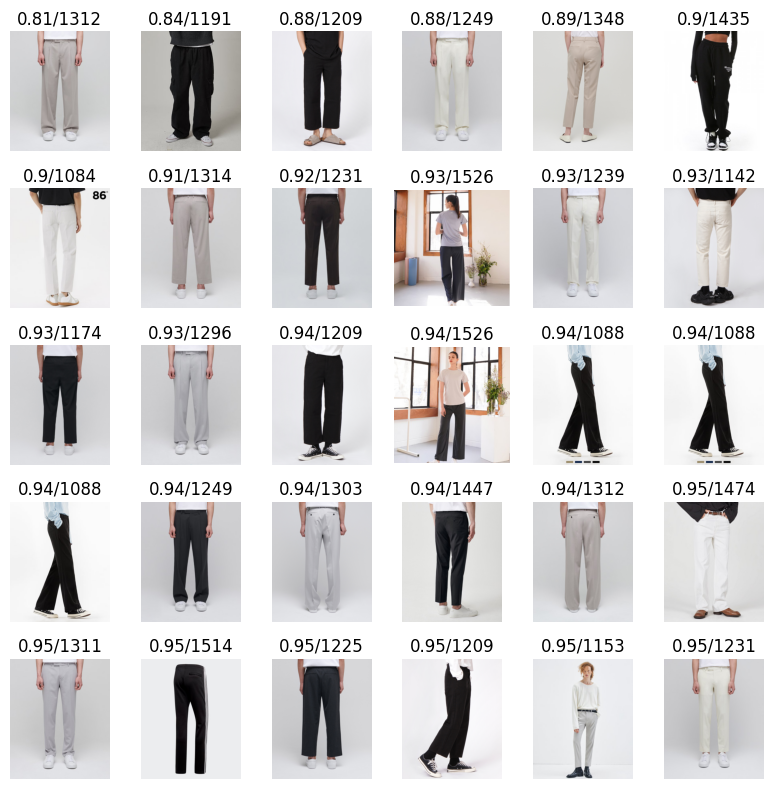

In [ ]:
# L2 norm 
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") 
fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images (L2 norm)
dists = np.linalg.norm(features - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

1/1 [==============================] - 4s 4s/step


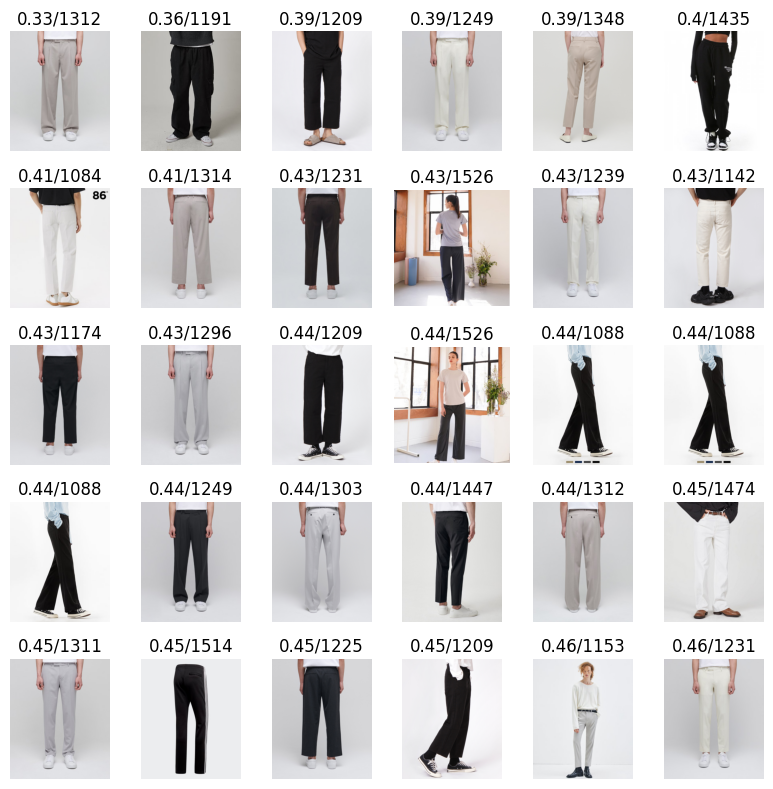

In [ ]:
# cosine similarity
# Insert the image query
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg")
fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images using cosine distance
dists = cosine_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()


1/1 [==============================] - 4s 4s/step


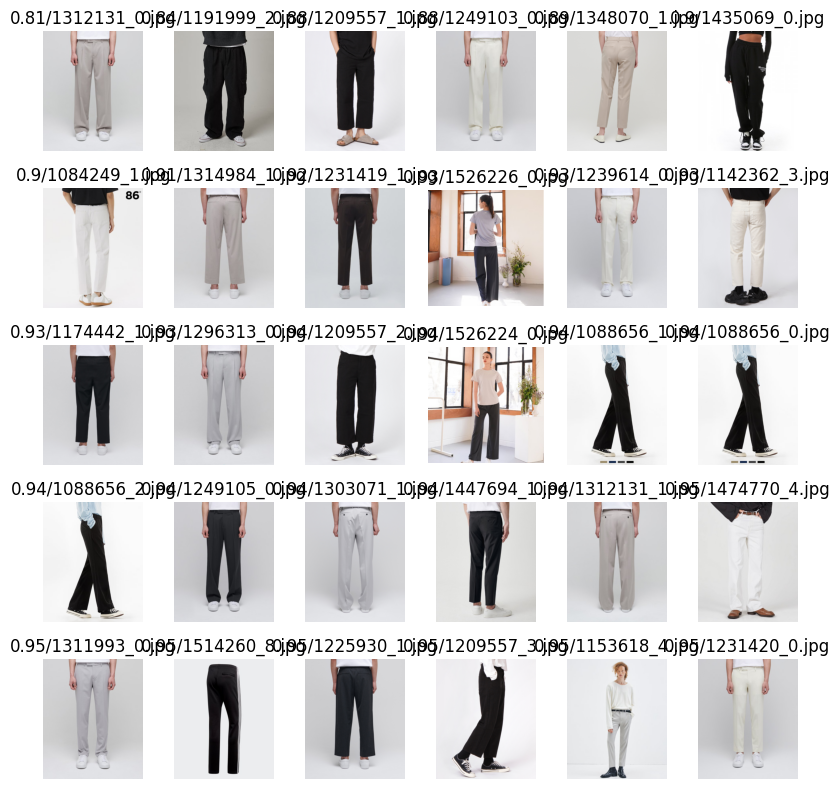

In [ ]:
# euclidean_distances
# Insert the image query
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") 

fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images using Euclidean distance
dists = euclidean_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()


1/1 [==============================] - 4s 4s/step


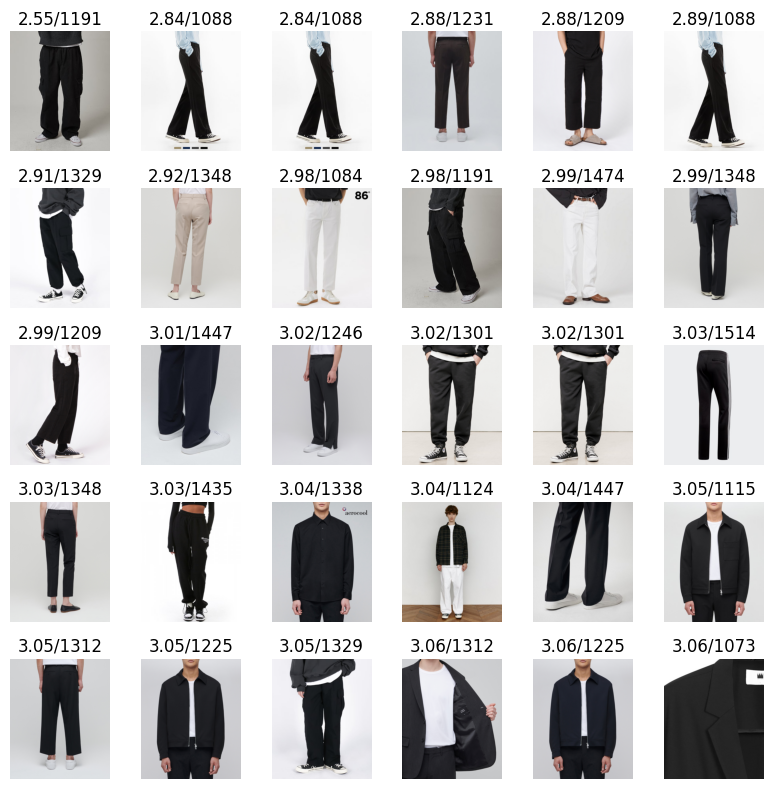

In [ ]:
# Manhattan 
# Insert the image query
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") 

fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images using Manhattan distance
dists = manhattan_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

### 2. Resnet50

In [ ]:
class FeatureExtractor:
    def __init__(self):
        base_model = ResNet50(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('predictions').output)

    def extract(self, img):
      # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        print(img)
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature

<PIL.Image.Image image mode=RGB size=224x224 at 0x21882CCEB00>
1/1 [==============================] - 1s 797ms/step


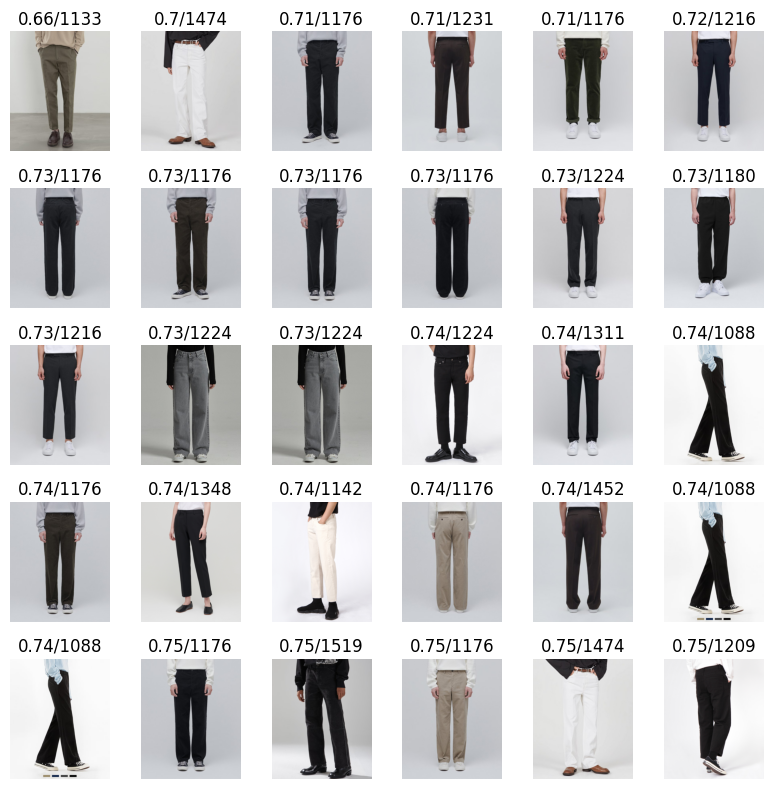

In [ ]:
# L2 norm
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") 
fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# L2 norm
dists = np.linalg.norm(features - query, axis=1)

# cosine_distances
dists_cosine = cosine_distances(features, query.reshape(1, -1)).ravel()

# euclidean_distances
dists_euclidean = euclidean_distances(features, query.reshape(1, -1)).ravel()

# manhattan_distances
dists_manhattan = manhattan_distances(features, query.reshape(1, -1)).ravel()


# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

<PIL.Image.Image image mode=RGB size=224x224 at 0x21884F84340>
1/1 [==============================] - 1s 715ms/step


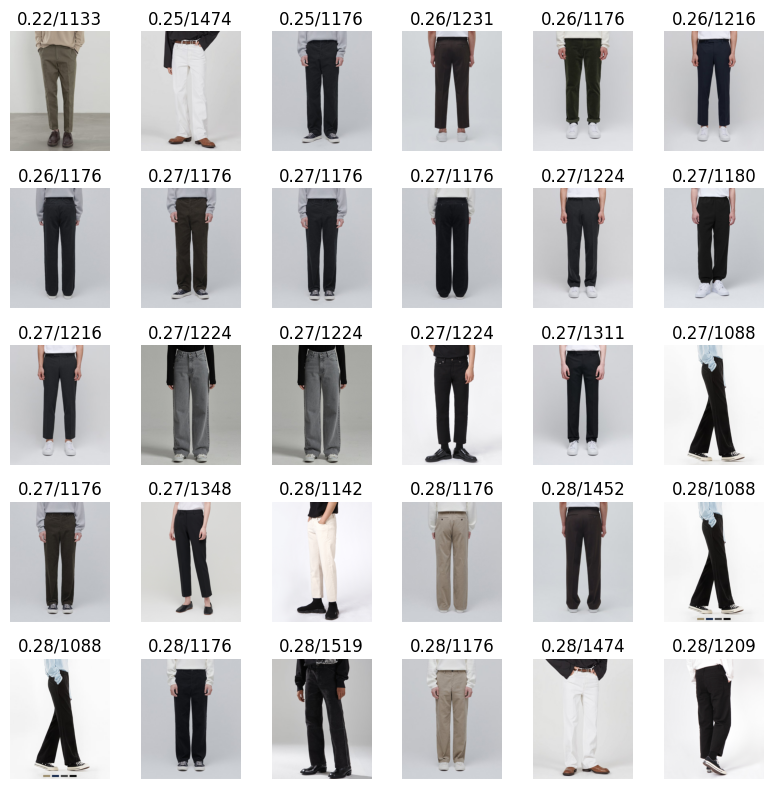

In [ ]:
# cosine_distances
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") 
fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images (L2 norm)
dists = cosine_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance 
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

<PIL.Image.Image image mode=RGB size=224x224 at 0x21882DF8DF0>
1/1 [==============================] - 1s 755ms/step


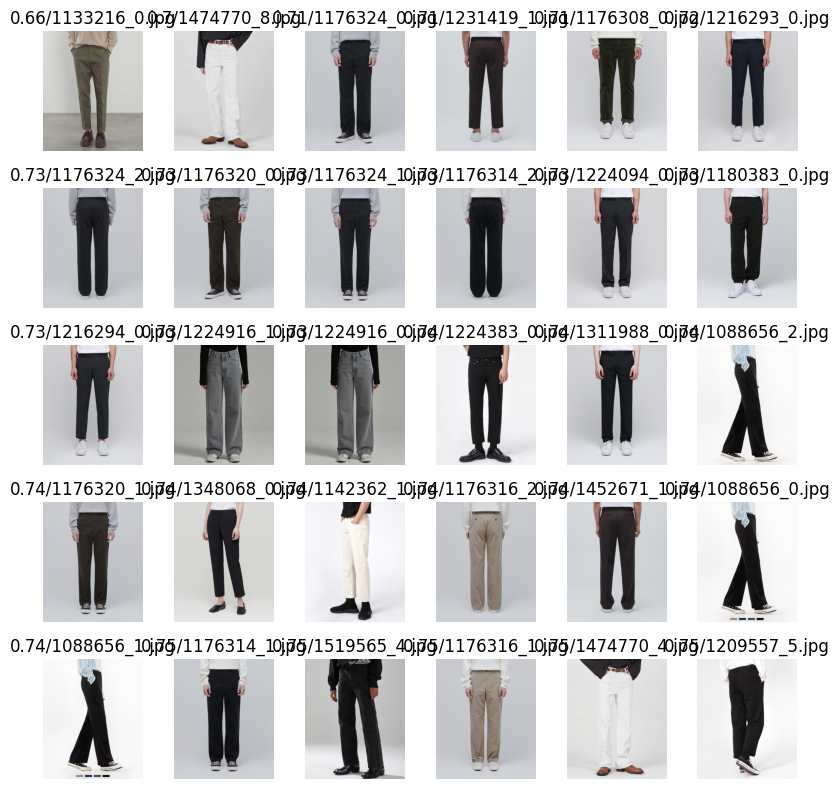

In [ ]:
# euclidean_distances
# Insert the image query
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") 

fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images using Euclidean distance
dists = euclidean_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()


<PIL.Image.Image image mode=RGB size=224x224 at 0x218850B8E50>
1/1 [==============================] - 1s 987ms/step


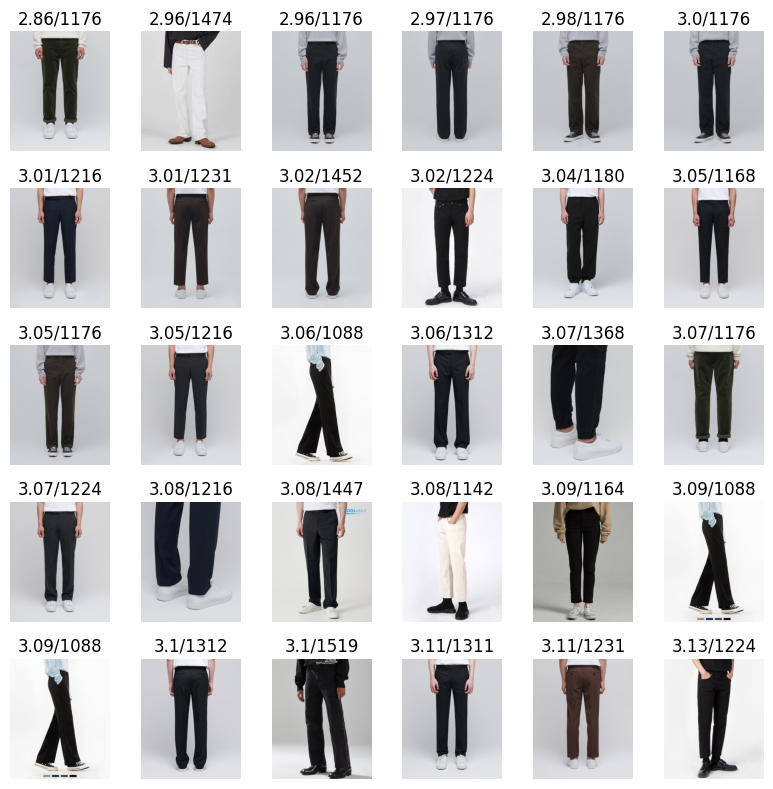

In [ ]:
# manhattan_distances
# Insert the image query
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") 

fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images using Manhattan distance
dists = manhattan_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

### 3.VGG19_InceptionResNetV2

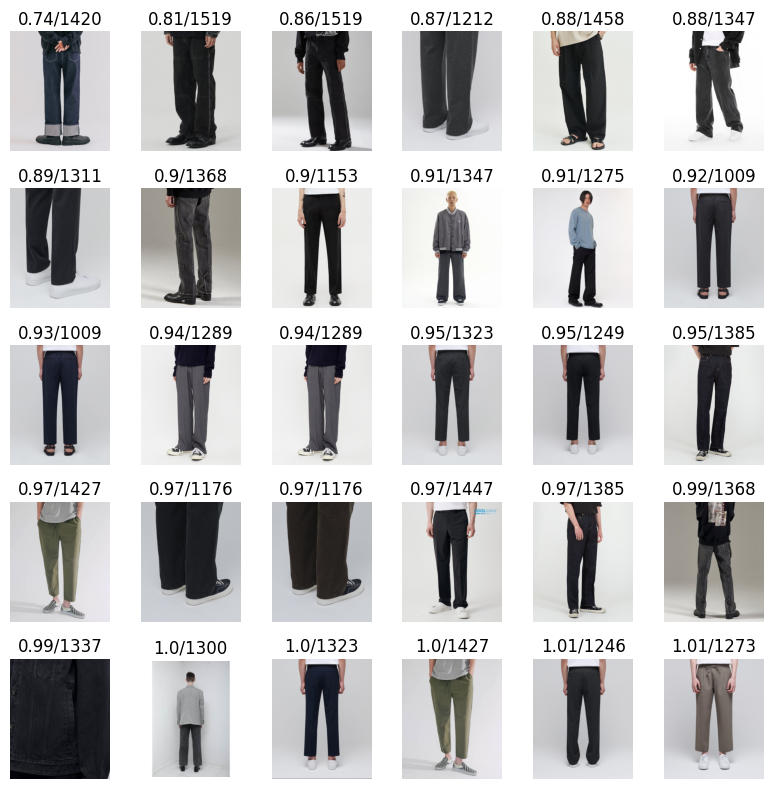

In [ ]:
# VGG19
class FeatureExtractor:
    def __init__(self):
        base_model = VGG19(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('predictions').output)

    def extract(self, img):
      # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature 
class FeatureExtractor_Irv2:
    def __init__(self):
        base_model = InceptionResNetV2(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('predictions').output)

    def extract(self, img):
      # Resize the image
        img = img.resize((299, 299))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input_irv2(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature
    
features = []
img_paths = []
files = []

fe = FeatureExtractor()
# Save Image Feature Vector with Database Images
for i in range(9990,10010):
    if i%100 == 0:
        print(i)
    try:
        path = 'C:/Users/NT550/Desktop/DL_project/image'
        os.chdir(path)
        files = os.listdir(path)
        image_path = 'C:/Users/NT550/Desktop/DL_project/image/{}'.format(files[i]) # image file name in the folder .append(image_path)
        
        # Extract Features
        feature = fe.extract(img=Image.open(image_path))
            
        features.append(feature)
        # Save the Numpy array (.npy) on designated path
     # set path to save Feature
        feature_path = "C:/Users/NT550/Desktop/DL_project/features/features" + files[i].strip('.jpg') + ".npy"
        np.save(feature_path, feature)
    except Exception as e:
        print('예외가 발생했습니다.', e)


features_vgg19 = []
file_list = os.listdir('C:/Users/NT550/Desktop/DL_project/features_VGG19')
for file in file_list[:10000]:
    feature = np.load(f'C:/Users/NT550/Desktop/DL_project/features_VGG19/{file}')
    features_vgg19.append(feature)
features_irv2 = []
file_list_irv2 = os.listdir('C:/Users/NT550/Desktop/DL_project/features_inception_ResNetv2')
for file in file_list_irv2[:10000]:
    feature = np.load(f'C:/Users/NT550/Desktop/DL_project/features_inception_ResNetv2/{file}')
    features_irv2.append(feature)

image_path = []
path = "C:/Users/NT550/Desktop/DL_project/image"
image_list = os.listdir(path)
for file in image_list[:10000]:
    image = path + '/' + file
    image_path.append(image)

img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_1.jpg")
fe = FeatureExtractor()
query_vgg19 = fe.extract(img)
dists_vgg19 = np.linalg.norm(features_vgg19 - query_vgg19, axis=1)
dists_vgg19_cosine = cosine_distances(features_vgg19, query_vgg19.reshape(1, -1)).ravel()
dists_vgg19_manhattan = manhattan_distances(features_vgg19, query_vgg19.reshape(1, -1)).ravel()

fe_irv2 = FeatureExtractor_Irv2()
query_irv2 = fe_irv2.extract(img)
dists_irv2 = np.linalg.norm(features_irv2 - query_irv2, axis=1)
dists_irv2_cosine = cosine_distances(features_irv2, query_irv2.reshape(1, -1)).ravel()
dists_irv2_manhattan = manhattan_distances(features_irv2, query_irv2.reshape(1, -1)).ravel()

dists = (dists_vgg19_manhattan + dists_irv2_manhattan) / 2 + (dists_vgg19_cosine + dists_irv2_cosine) / 2 + (dists_vgg19 + dists_irv2) / 2

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

# Extract 30 images that have lowest distance 
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

1/1 [==============================] - 0s 286ms/step


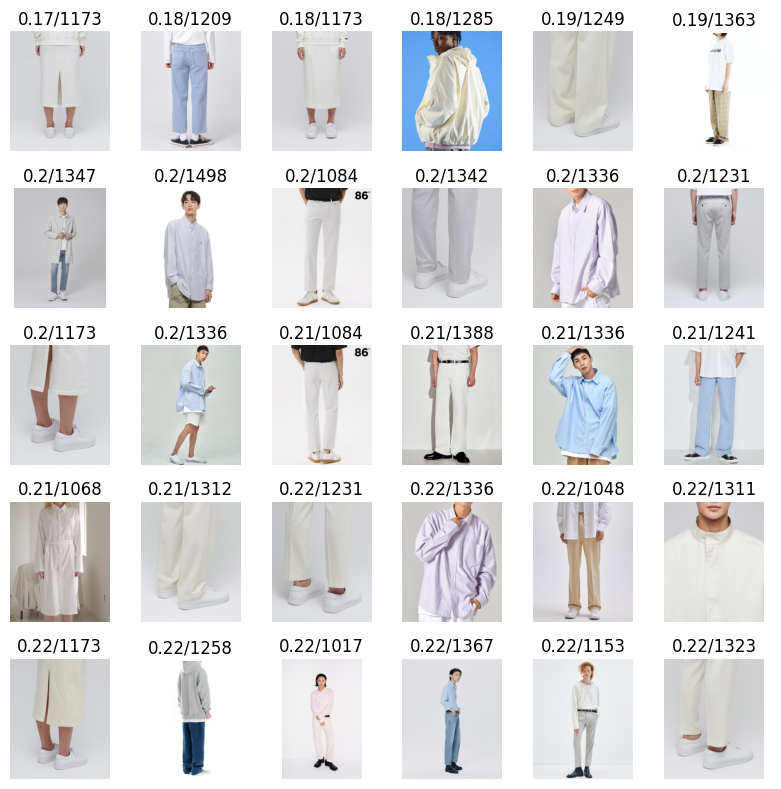

In [ ]:
#cosine_distances

# Insert the image query
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") 

fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images using cosine distance
dists = cosine_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()


1/1 [==============================] - 0s 291ms/step


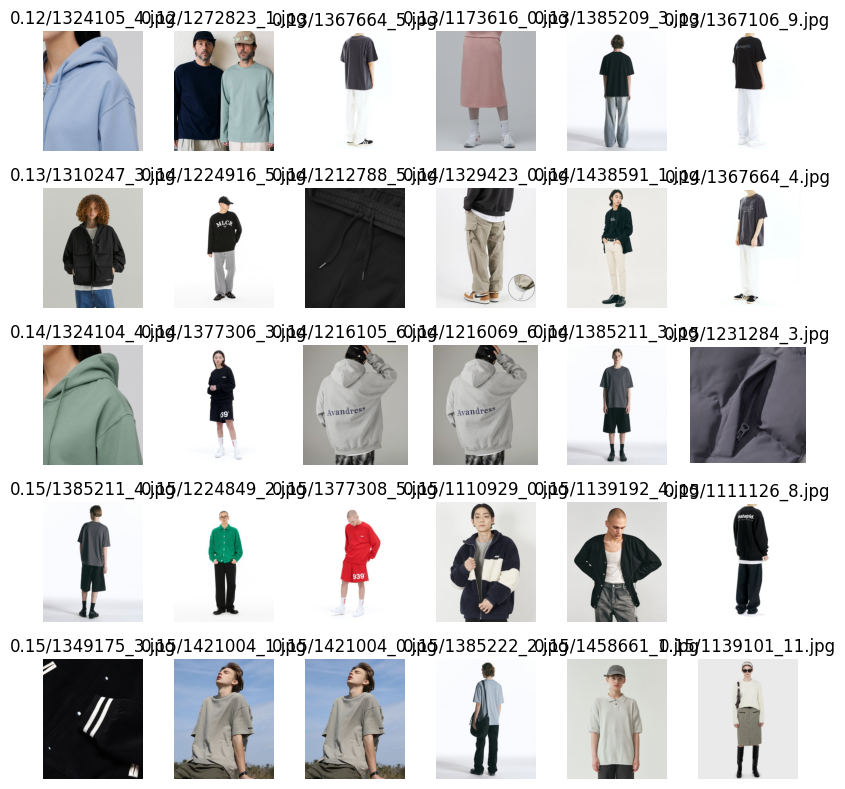

In [ ]:
# euclidean_distances
# Insert the image query
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_3.jpg") 

fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images using Euclidean distance
dists = euclidean_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()


1/1 [==============================] - 0s 292ms/step


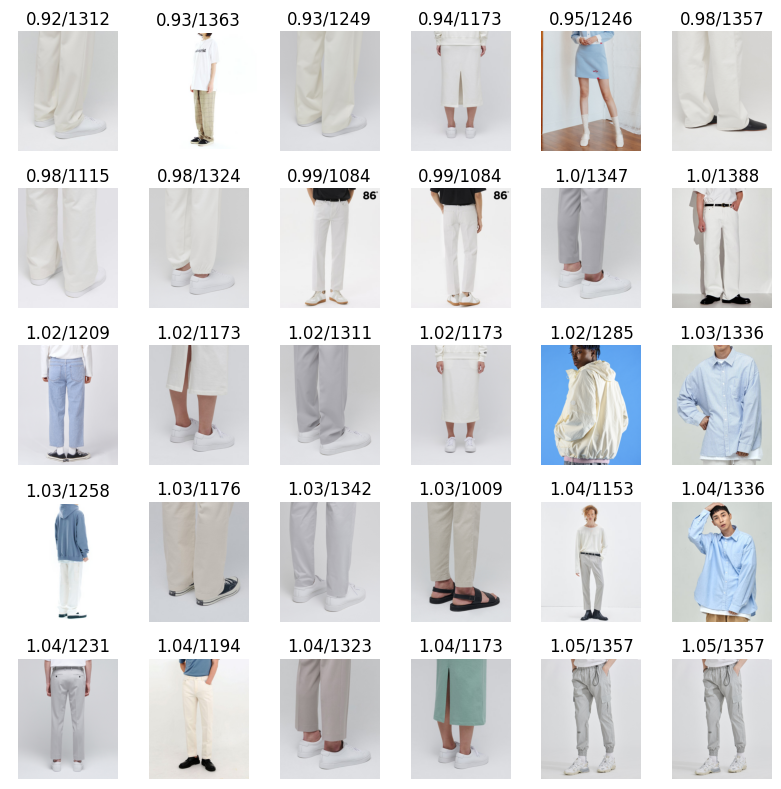

In [ ]:
# manhattan_distances
# Insert the image query
img = Image.open("C:/Users/NT550/Desktop/DL_project/bg_0.jpg") 

fe = FeatureExtractor()
# Extract its features
query = fe.extract(img)

# Calculate the similarity (distance) between images using Manhattan distance
dists = manhattan_distances(features, query.reshape(1, -1)).ravel()

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]

scores = [(dists[id], image_path[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4]
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

### 4. Annoy

In [ ]:
# Euclidian 
device = "cuda" if torch.cuda.is_available() else "cpu" # Check if GPU is available in the Torch library and set the device variable to "cuda" if available,  otherwise set it to "cpu"

model, _ = clip.load("ViT-B/32", device=device) # Load the CLIP model. ViT-B/32 is one of the configurations of the CLIP model.
preprocess = T.Compose([
    T.Resize((224, 224)), # T.Resize(224) resizes the image to 224x224, 
    T.CenterCrop(224), # and T.CenterCrop(224) crops the image to the center with a size of 224x224.
    T.ToTensor()
])

embedding_size = 512  # Dimension of feature vectors in the CLIP model
n_trees = 100  # Number of trees in the annoy index

annoy_index = AnnoyIndex(embedding_size, 'euclidean')

image_files = glob.glob(r"C:\Users\NT550009\Desktop\detail_image_aggregated/*.jpg")

for image_id, image_file in enumerate(image_files):
    image = Image.open(image_file).convert("RGB")
    image = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image) # Use the model object to encode the image and extract feature vectors (embeddings).
    image_features = image_features.cpu().numpy().flatten() # Move the feature vectors to CPU memory, convert to a NumPy array, and flatten to 1D for adding to the Annoy index.
    annoy_index.add_item(image_id, image_features)

annoy_index.build(n_trees)

annoy_index.save("annoy_index.ann")
annoy_index = AnnoyIndex(embedding_size, 'euclidean')


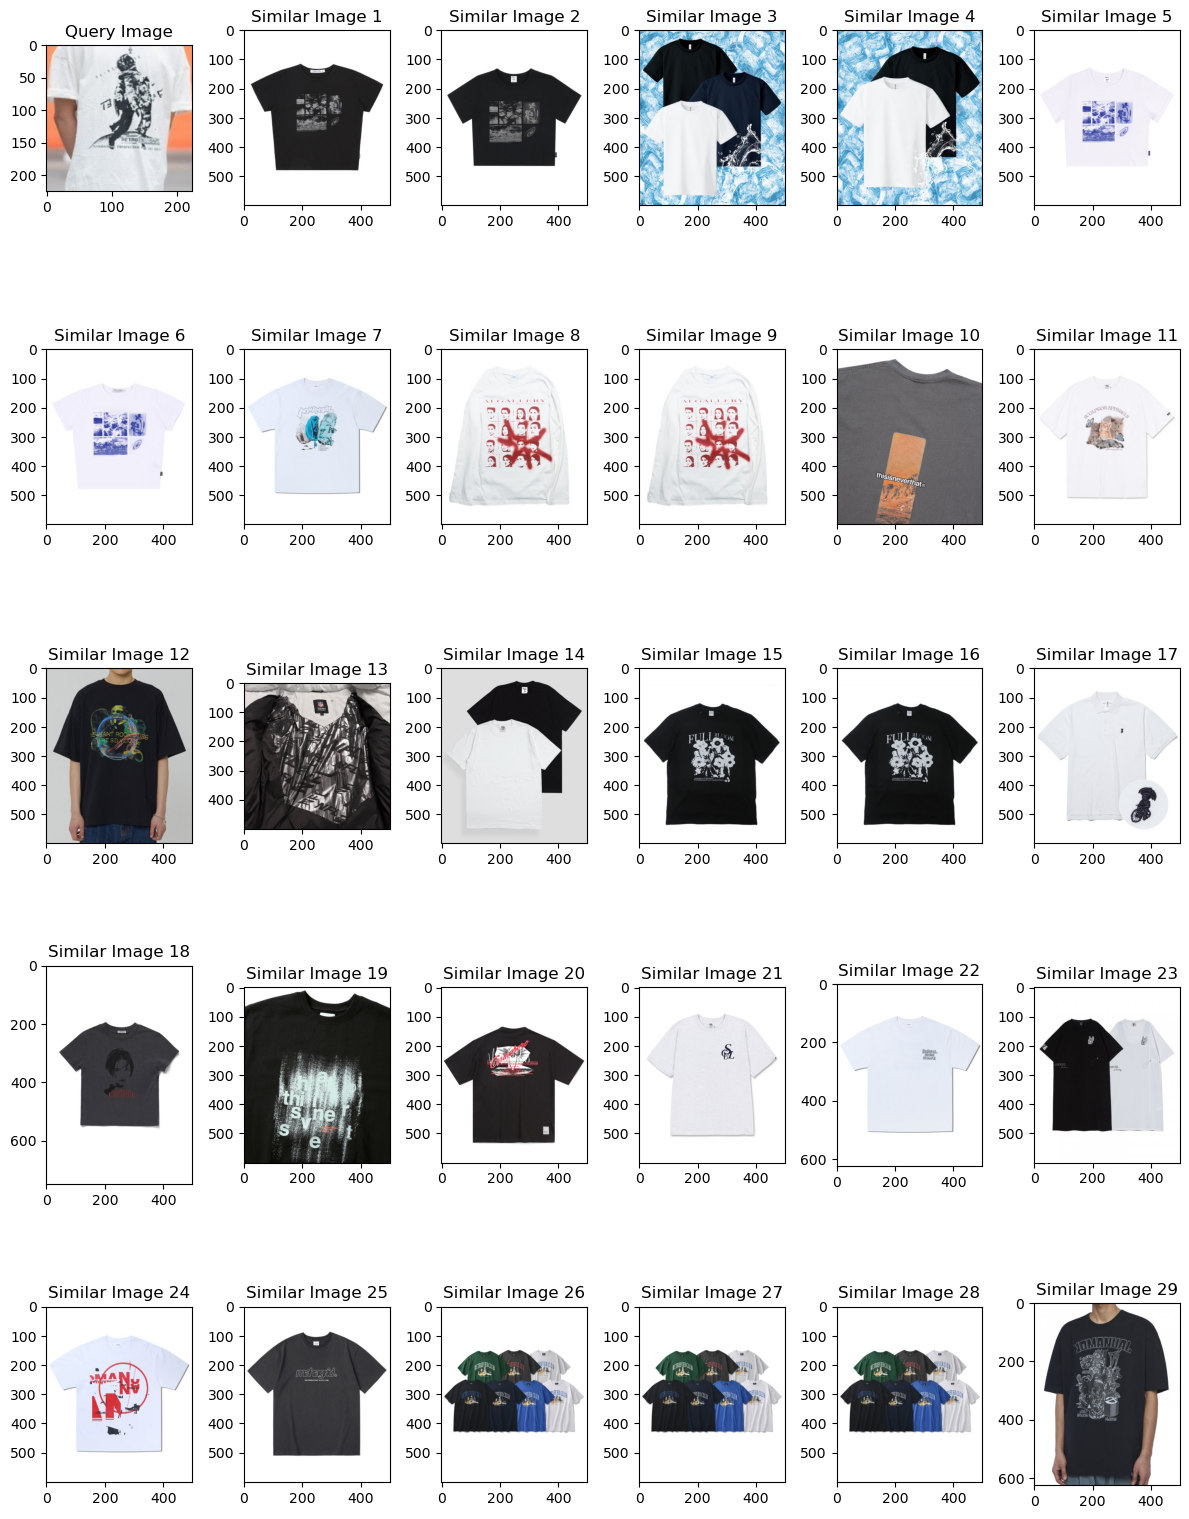

In [ ]:
# 1. Prepare the query image
query_image_path = r"C:\Users\NT550009\Desktop\recommendation\T-shirt.jpg"
query_image = Image.open(query_image_path).convert("RGB")

# 2. Preprocess the query image and extract feature vectors
query_preprocess = T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor()
])
query_image = query_preprocess(query_image).unsqueeze(0).to(device)
with torch.no_grad():
    query_features = model.encode_image(query_image)
query_features = query_features.cpu().numpy().flatten()

# 3. Search for similar image indices in the Annoy index
n_similar_images = 29
similar_image_indices = annoy_index.get_nns_by_vector(query_features, n_similar_images)

# 4. Retrieve similar images
similar_images = [Image.open(image_files[index]).convert("RGB") for index in similar_image_indices]

# 5. Display the query image and similar images using plt
fig, axes = plt.subplots(5, 6, figsize=(12, 16))

axes[0, 0].imshow(query_image.squeeze().permute(1, 2, 0))
axes[0, 0].set_title("Query Image")

for i, image in enumerate(similar_images):
    row = (i + 1) // 6
    col = (i + 1) % 6
    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Similar Image {i+1}")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# cosine 
device = "cuda" if torch.cuda.is_available() else "cpu" # Check for GPU availability

model, _ = clip.load("ViT-B/32", device=device) # Load the CLIP model, ViT-B/32 is one of the configurations of the CLIP model
preprocess = T.Compose([
    T.Resize((224, 224)), 
    T.CenterCrop(224),
    T.ToTensor()
])

embedding_size = 512  # the embedding size to 512
n_trees = 100  # the number of trees for the annoy index

annoy_index = AnnoyIndex(embedding_size, 'angular') # Initialize the Annoy index and use 'angular' as the distance metric 

image_files = glob.glob(r"C:\Users\NT550009\Desktop\detail_image_aggregated/*.jpg")
    
for image_id, image_file in enumerate(image_files):
    image = Image.open(image_file).convert("RGB")
    image = preprocess(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        image_features = model.encode_image(image) # Encode the image using the model to extract image features
    image_features = image_features.cpu().numpy().flatten() # Move the image features to CPU, convert them to a NumPy array, and flatten to 1D
    
    annoy_index.add_item(image_id, image_features)

annoy_index.build(n_trees) # the more number of trees, the higher the accuracy however it takes longer 
annoy_index.save("annoy_index_angular.ann")

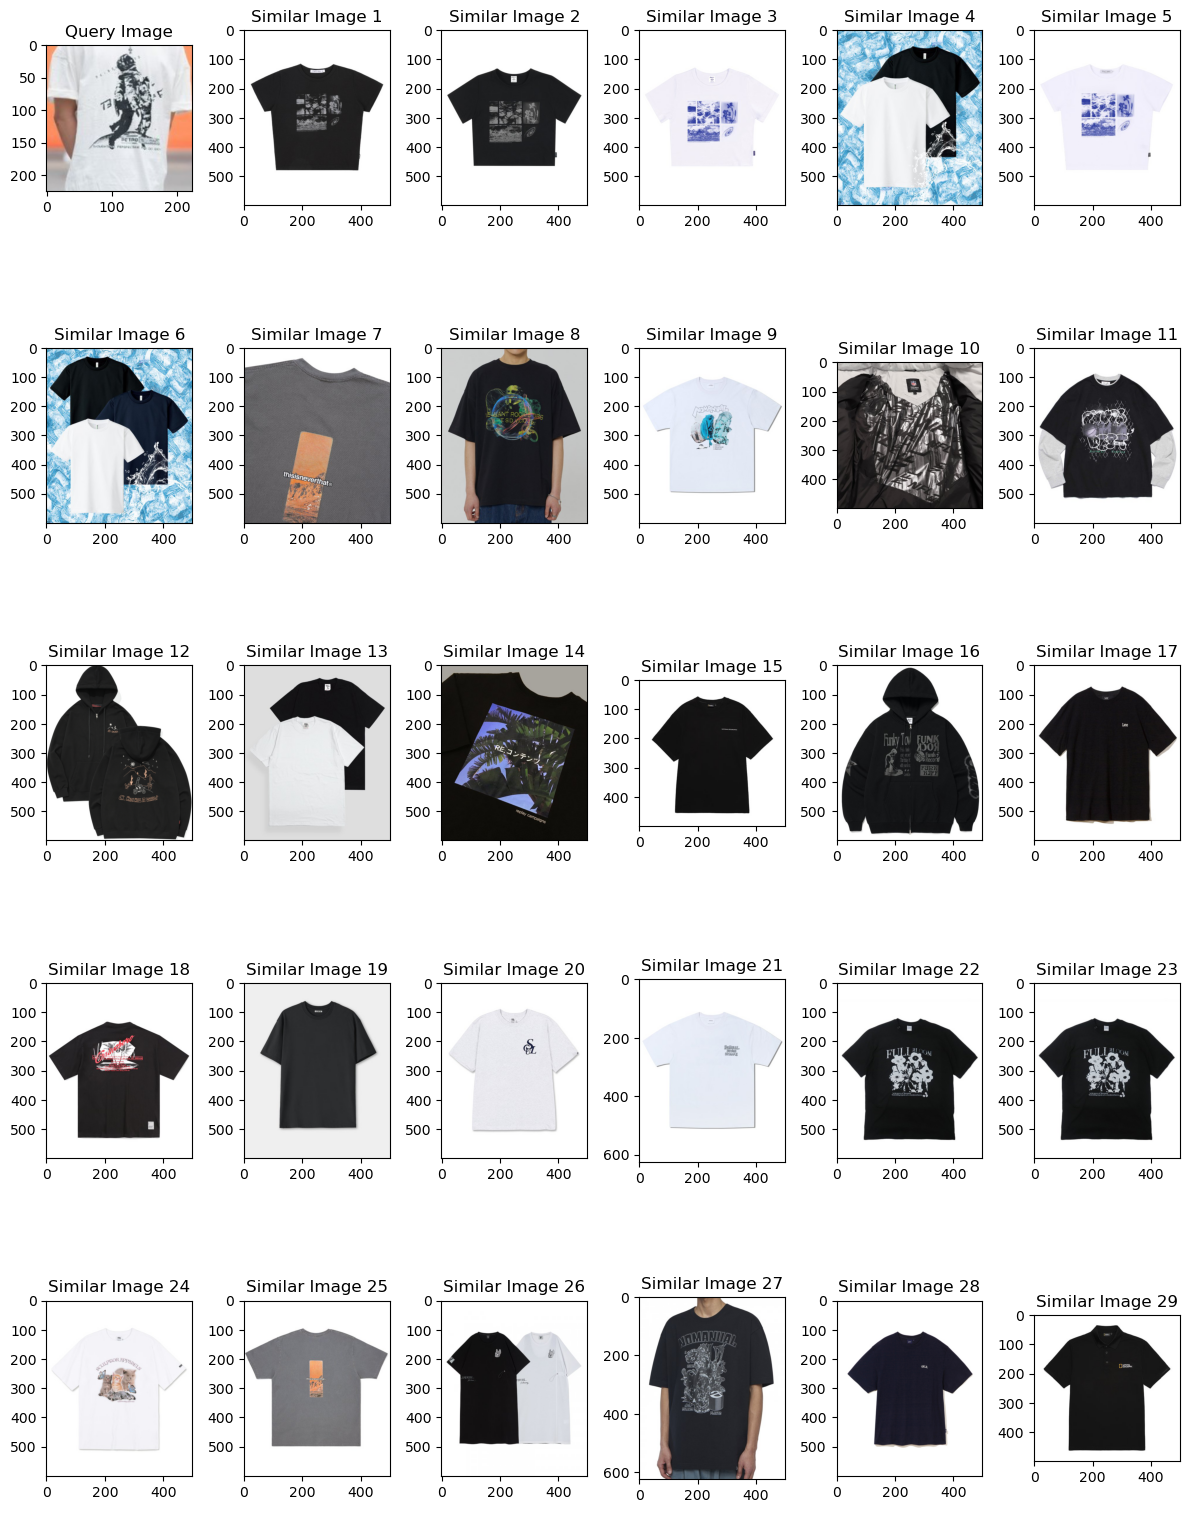

In [ ]:
# 1. prepare query image path
query_image_path = r"C:\Users\NT550009\Desktop\recommendation\T-shirt.jpg"
query_image = Image.open(query_image_path).convert("RGB")

# preprocess a query image
query_preprocess = T.Compose([
    T.Resize(224),
    T.CenterCrop(224),
    T.ToTensor()
])
query_image = query_preprocess(query_image).unsqueeze(0).to(device)
with torch.no_grad():
    query_features = model.encode_image(query_image)
query_features = query_features.cpu().numpy().flatten()

# 3. search for similar index of query in Annoy Index
n_similar_images = 29
similar_image_indices = annoy_index.get_nns_by_vector(query_features, n_similar_images)

# 4. bring similar images
similar_images = [Image.open(image_files[index]).convert("RGB") for index in similar_image_indices]

# 5. print similar images as plt 
fig, axes = plt.subplots(5, 6, figsize=(12, 16))

axes[0, 0].imshow(query_image.squeeze().permute(1, 2, 0))
axes[0, 0].set_title("Query Image")

for i, image in enumerate(similar_images):
    row = (i + 1) // 6
    col = (i + 1) % 6
    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Similar Image {i+1}")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.tight_layout()
plt.show()